### Install dependencies

In [1]:
!pip install numpy matplotlib
!pip install pythonperlin

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com



[notice] A new release of pip is available: 24.0 -> 24.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com


[notice] A new release of pip is available: 24.0 -> 24.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import time
import random

import numpy as np
import matplotlib.pyplot as plt
from pythonperlin import perlin

### Helper functions

In [3]:
def perlin_function(t, dens=100):
    """
    Generate perlin noise
    """
    n = len(t)
    shape = (1,int(n/dens))
    
    # Generate noise
    x = perlin(shape, dens=dens, seed=random.randint(0,99999))
    # get the first channel
    x = x[0]
    return x

def remap(x, x_min, x_max, y_min, y_max):
    """
    Remap x from x_min, x_max to y_min, y_max
    """
    return (x - x_min) / (x_max - x_min) * (y_max - y_min) + y_min

Plot function for code optimisation. As argument receive dictionary with data to plot and labels for x and y axis., data is an array of dictionaries with data to plot and labels for each plot.

In [4]:
def plot(data, x_label, y_label):
    """
    Plot data
    data format: [{'label': label, 'value': value}]
    """
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.grid(alpha=0.1)
    plt.axhline(0, color='black', lw=1, alpha=0.5)
    for d in data:
        plt.plot(t, d['value'], label=d['label'])
    # legend outside the plot
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    
    
def plot_multiple(data, x_label, y_label, w=15, h=5):
    """
    Plot multiple data
    data format: [[{'label': label, 'value': value}], [{'label': label, 'value': value}]]
    """
    n = len(data[0])
    fig, axs = plt.subplots(n, 1, figsize=(w, h*n))  # Adjust the size according to your needs
    
    plots = []
    for i in range(len(data[0])):
        plots.append([])
    
    # reorganize it where from each data[i] we get data[i][j] and put it in plots[j][i]
    for d in enumerate(data):
        i, d = d
        for d_ in enumerate(d):
            j, d_ = d_
            plots[j].append([d_['label'], d_['value']])
        # legend outside the plot
     
    for i in range(len(plots)):
        axs[i].set_xlabel(x_label)
        axs[i].set_ylabel(y_label)
        axs[i].grid(alpha=0.1)
        axs[i].axhline(0, color='black', lw=1, alpha=0.5)
        for j in range(len(plots[i])):
            if j == 0:
                axs[i].plot(t, plots[i][j][1], label=plots[i][j][0], lw=3)
            else:
                axs[i].plot(t, plots[i][j][1], label=plots[i][j][0], alpha=0.5, linestyle='dashed')
        axs[i].legend(loc='center left', bbox_to_anchor=(1, 0.5))
        
    plt.tight_layout()
    plt.show()
    

### Parameters

Here we define the parameters for the simulation. These parameters include the time range, the total finite resources, and other parameters that affect the expansion, survival probability, and other functions of a civilization.
This parameters setup in a logical way but can't be used as is and as the final version of the model.

In [13]:
t = np.linspace(0, 500, 1000)           # time
R = 100                                 # Total finite resources
N = 5                                   # Number of civilizations
R_i = 0.3                               # Risk coefficient

In [ ]:
# TODO: Add more parameters
# P_i = 0.1                               # Probability of being detected if communicating
# D_i = 0.9                               # Probability of destruction if detected
# tau = 50                                # Threat threshold
# alpha = 0.01                            # Decay rate for survival probability
# C_i = 0.5                               # Collaboration coefficient

### Expansion function
E_i(t) over time for a civilization. 
This is simplified model of the expansion of a civilization over time for a basic comparison of the survival probability with and without competition.

The expansion_function is a Python function that models the expansion of a civilization over time. It takes time t as an input and returns a value representing the expansion of the civilization at that time.  

The function is based on the following assumptions:  
- Every civilization would require a certain amount of resources to expand.
- The expansion rate is increasing over time.
- The resources required for expansion are increasing over time.

The function uses the mathematical expression 1 - np.exp(-t/100) to model the expansion. This expression represents a growth curve where expansion is slow at the beginning and accelerates over time. The value 100 in the denominator controls the rate of expansion. The function returns a value between 0 and 1, where 0 represents no expansion and 1 represents maximum expansion.  

$$
\begin{equation}
E_i(t) = 1 - e^{-t \cdot \text{exp\_coefficient} / 100}
\end{equation}
$$

TODO:
Consider the following factors when modeling the expansion of a civilization:
- Each civilization could have a different expansion rate based on its resources and technology. (e.g., advanced civilizations may expand faster than primitive civilizations) - Exp_coefficient



In [6]:
def expansion_function(t, exp_coefficient = .5):
    """
    Expansion function E_i(t) over time for a civilization
    :param t: 
    """
    return 1 - np.exp(-t * exp_coefficient / 100)

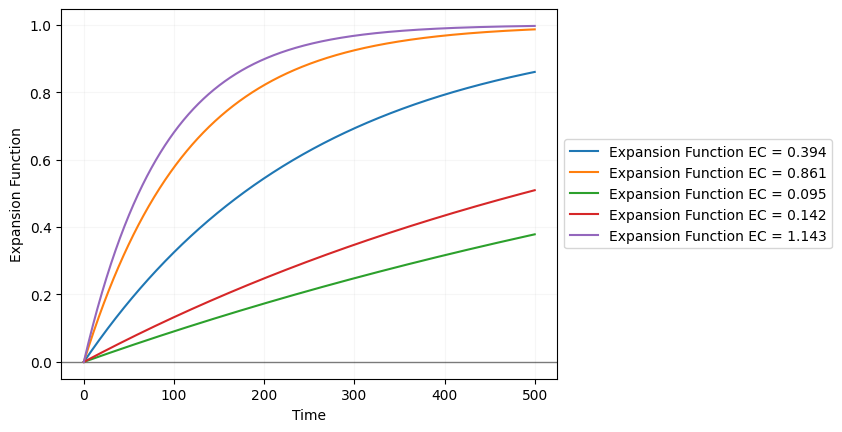

In [8]:
expansion_f = []

for i in range (5):
    e_coeff = random.random() * 1.5
    E_i = expansion_function(t, e_coeff)
    expansion_f.append({'label': 'Expansion Function EC = {}'.format(round(e_coeff,3)), 'value': E_i})
    
plot(expansion_f, 'Time', 'Expansion Function')


### Resources function
Resources function R(t) over time for a civilization

Assume:
-  Total finite resources

$$
\begin{equation}
R(t) = R
\end{equation}
$$

In [9]:
def resources_function(t):
    """
    Resources function R(t) over time for a civilization
    :param t: time
    """
    return np.ones_like(t) * R

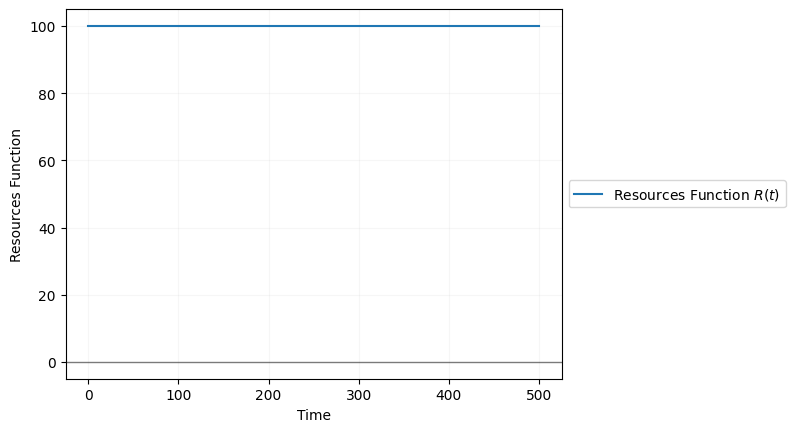

In [10]:
resources_f = [{'label': 'Resources Function $R(t)$', 'value': resources_function(t)}]
plot(resources_f, 'Time', 'Resources Function')

### Resources scarcity function

This is one of the main arguments of the Dark Forest Hyphotisis. 

Resources scarcity function S(t) over time
- The resources scarcity function S(t) over time for a civilization is a measure of the availability of resources at a given time.
- The function takes time t as an input and returns a value between 0 and 1, where 0 represents abundant resources and 1 represents scarce resources.

$$
\begin{equation}
S(t) = 1 - \frac{R - N \cdot \text{initial_resources} \cdot \text{expansion_function}(t)}{R}
\end{equation}
$$

#### TODO:
- I think here we can consider the resources based on the number of civilisations.
- Civilisations can be born and die, so the resources can be re-distributed.
- So, actually the resources function should have feedback from the survival probability function.


In [14]:
def resources_scarcity_function(t):
    """
    Resources scarcity function S(t) over time for a civilization
    :param t: time
    """
    return 1 - (R - N * R * expansion_function(t)) / R

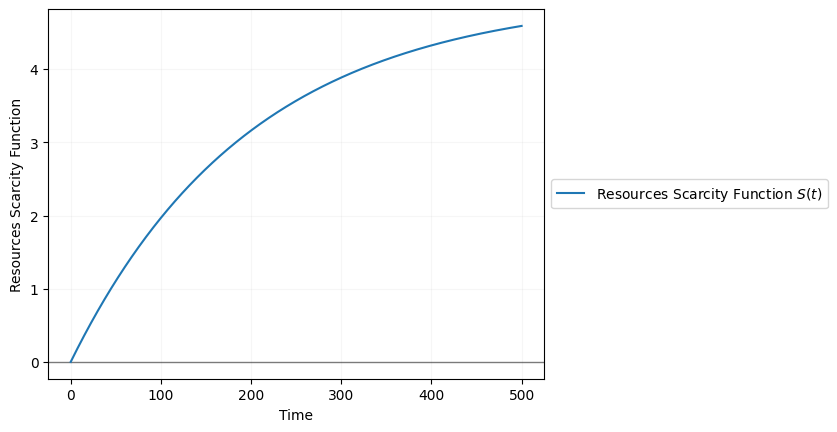

In [15]:
resources_scarcity_f = [{'label': 'Resources Scarcity Function $S(t)$', 'value': resources_scarcity_function(t)}]
plot(resources_scarcity_f, 'Time', 'Resources Scarcity Function')

### Risk coefficient and black swans

This function would represent the risk coefficient over time for a civilization. The risk coefficient is a measure of the level of risk or uncertainty faced by a civilization at a given time. It takes into account various factors such as the base risk level, the presence of black swans (random rare big events), and small correlations over time (noise).

Assume:
- The base risk level should be higher at the beginning and reduce over time with a coefficient.
- Black swans events are random and rare, but they can have a significant impact on the risk level.
- Small correlations over time also affect the risk level. These correlations can be modeled using Perlin noise.

$$
\begin{equation}
R_i(t) = R_i \cdot e^{-t \cdot \text{coef}} + R_i \cdot \text{black\_swans} \cdot \text{random} \cdot 4 + R_i \cdot \text{perlin\_noise}
\end{equation}
$$

In [105]:
def risk_coefficient(t, alpha=0.01, base=0.3, bs=0.01):
    """
    Risk coefficient R_i(t) over time for a civilization
    :param t: time
    :param alpha: coefficient for reducing risk over time
    :param base: base risk level
    :param bs: probability of black swans events
    """
    
    #  base risk level higher at the beginning and reduces over a time with coefficient
    risk_c = R_i * np.exp(-t * alpha)
    
    # Black swans
    bl_swan = np.random.rand(*t.shape) < bs
    risk_c += R_i * bl_swan * np.random.rand(*t.shape) * 4
    
    # Small correlations over time (perlin noise)
    prl = perlin_function(t) * .3
    prl += perlin_function(t, 10) * .05
    prl += perlin_function(t, 2) * .02
    risk_c += R_i * prl
    
    # risk should be between 0 and 1
    # risk = np.clip(risk_c, 0, 1)
    
    return risk_c

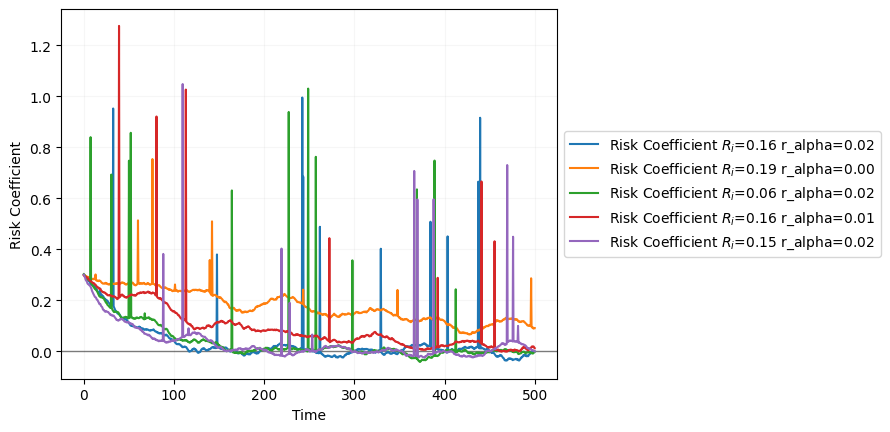

In [114]:
risk_f = []

for i in range(5):
    r_alpha = random.random() * .05
    r_base = random.random() * .3
    r_bl_sw = .01
    risk = risk_coefficient(t, r_alpha, r_base, r_bl_sw)
    risk_f.append({'label':'Risk Coefficient $R_i$={:.2f} r_alpha={:.2f}'.format(r_base, r_alpha), 'value': risk})

plot(risk_f, 'Time', 'Risk Coefficient')

### Black swans for the advanced technology or knowledge

Here we calculating the rare events that can have a significant impact on the expansion of a civilization. Events like the discovery of advanced technology or knowledge that can change the course of history. 

Assume:
- The probability of black swans events is low but can have a significant impact.
- The impact of black swans events is random and can vary in magnitude.
- The impact of black swans events is cumulative over time.
- The impact of black swans events is positive in collaboration environment as they would benefit to all civilizations.
- The impact of black swans events can be negative in the high competition environment as they can provide strategic advantage to the civilization that discovered them.

In [107]:
def black_swans(t, bs=0.01):
    """
    Black swans events over time for a civilization
    :param t: time
    :param bs: probability of black swans events
    """

    # set random seed
    np.random.seed(random.randint(0,99999))
    
    # generate black swans events
    bs_knowledge = np.random.rand(*t.shape) < bs
    bs_knowledge = bs_knowledge * np.random.rand(*t.shape) * 0.1
    
    # sum up black swans
    bs_knowledge_sum = []
    for i in range(len(t)):
        bs_knowledge_sum.append(np.sum(bs_knowledge[0:i]))
        
    return bs_knowledge_sum, bs_knowledge

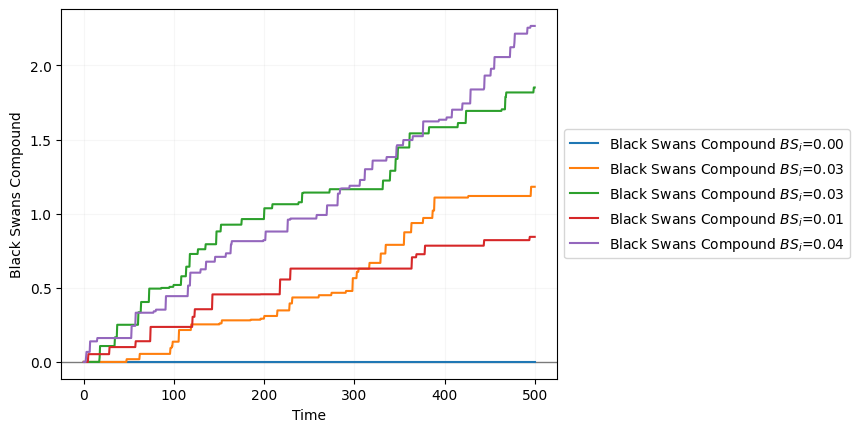

In [109]:
bs_compound_f = []
bs_noise_f = []

for i in range(5):
    bs_alpha = random.random() * .05
    bs_sum, bl_sw = black_swans(t, bs_alpha)
    bs_compound_f.append({'label':'Black Swans Compound $BS_i$={:.2f}'.format(bs_alpha), 'value': bs_sum})
    bs_noise_f.append({'label':'Black Swans $BS_i$={:.2f}'.format(bs_alpha), 'value': bl_sw})

plot(bs_compound_f, 'Time', 'Black Swans Compound')

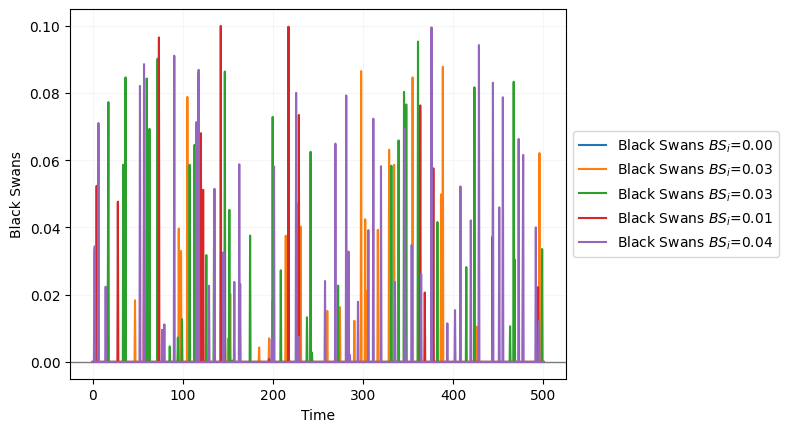

In [110]:
plot(bs_noise_f, 'Time', 'Black Swans')

## Collaboration scenario

Here we would consider the collaboration scenario. The collaboration scenario is based on the assumption that civilizations can collaborate and share knowledge and resources to improve their chances of survival.

### Collaboration function

The collaboration function C_i(t) over time for a civilization.

Assume:
- The collaboration coefficient C_i is low at the beginning and increases over time as civilizations adapt to each other and become more dependent on each other (longer periods of collaboration lead to more trust).
- The trust would affect the risk coefficient, higher trust would reduce the risk. This would take effect in the uncertainty of the black swan events.
- The Knowledge Black Swans events can have a positive impact on the collaboration environment as they would benefit all civilizations.
- The collaboration function can be negative at the beginning as it takes time to adapt to each other and it can introduce some risks.


$$
\begin{equation}
C_i(t) = -R_i + \log(t + 1) / \log(\text{adapt}) + \text{risk\_aver} + \text{bs\_sum}
\end{equation}
$$

TODO:
- Collaboration leads to increasing diversification, which reduces the risks of extinction.
- Collaboration would have some tax for preserving less adapted species. This tax can increase over time as it would require more resources as more species are involved.


In [111]:
def collaboration_function(t, risk, bs_sum, r_aver=20, adapt=30, R_i=0.3):
    """
    Collaboration coefficient C_i(t) over time for a civilization
    :param t: time
    :param risk: risks
    :param bs_sum: knowledge black swans
    :param r_aver: average period for risks
    :param adapt: adaptation period for black swans
    :param R_i: risk coefficient
    """
    
    # collaboration coefficient C_i low at the beginning and increase over time as civilizations adapt to each other
    collaboration_c = -R_i + np.log(t + 1) / np.log(adapt)
    
    # remap it and clip
    collaboration_c = remap(collaboration_c, 0, max(collaboration_c), 0, 0.8)
    
    
    # add risks, risk would have effect over time
    risk_aver = []
    for i in range(len(t)):
        # average risk over the period r_aver
        risk_aver.append(np.mean(risk[max(0, i - r_aver):i]))
        
    # reduce the risk over time with the average risk (more trust - less risk)
    collaboration_c -= risk_aver * remap(collaboration_c, -R_i, 1, 3, 2) 
    
    # add black swans (positive, they can represent some advanced technology or knowledge)
    collaboration_c += bs_sum
    
    return collaboration_c

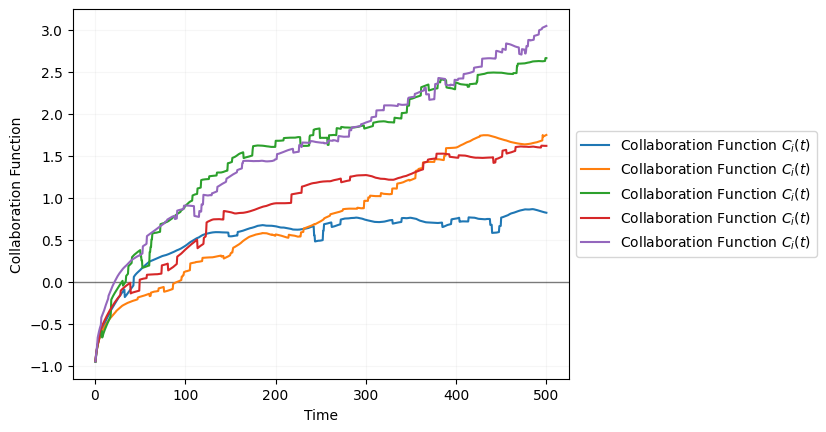

In [197]:
collaboration_f = []

for i in range(5):
    col_f = collaboration_function(t, risk_f[i]['value'], bs_compound_f[i]['value'], 20)
    collaboration_f.append({'label':'Collaboration Function $C_i(t)$', 'value': col_f})

plot(collaboration_f, 'Time', 'Collaboration Function')

### Survival probability function with collaboration
The survival probability function S_i(t) over time for a civilization with collaboration.

Assume:
- The survival probability is 1 at the beginning and reduces over time with a decay rate alpha.
- If the risk is high, the survival probability is lower.
- If collaboration is high, the survival probability is higher.
- Compound risks (all previous risks are summed up).
- The base survival probability is calculated using the mathematical expression np.exp(-alpha * t).

$$
\begin{equation}
S_i(t) = \exp(-\alpha \cdot t) - \sum_{i=0}^{t} R_i \cdot \text{risk\_coef} + C_i(t)
\end{equation}
$$


In [198]:
def survival_probability_function(t, risk, col_f, alpha=0.01, risk_coef=0.1):
    """
    Survival probability function S_i(t) over time for a civilization
    :param t: time
    :param risk: risks
    :param col_f: collaboration function
    :param alpha: decay rate
    :param risk_coef: risk coefficient
    """
    
    # The base survival probability is calculated using the mathematical expression np.exp(-alpha * t)
    survival = np.exp(-alpha * t)
    
    # risks
    risks = []
    for i in range(len(t)):
        risks.append(np.sum(risk[0:i]) * risk_coef)
        
    survival -= risks
    # collaboration
    survival += col_f
        
    return survival

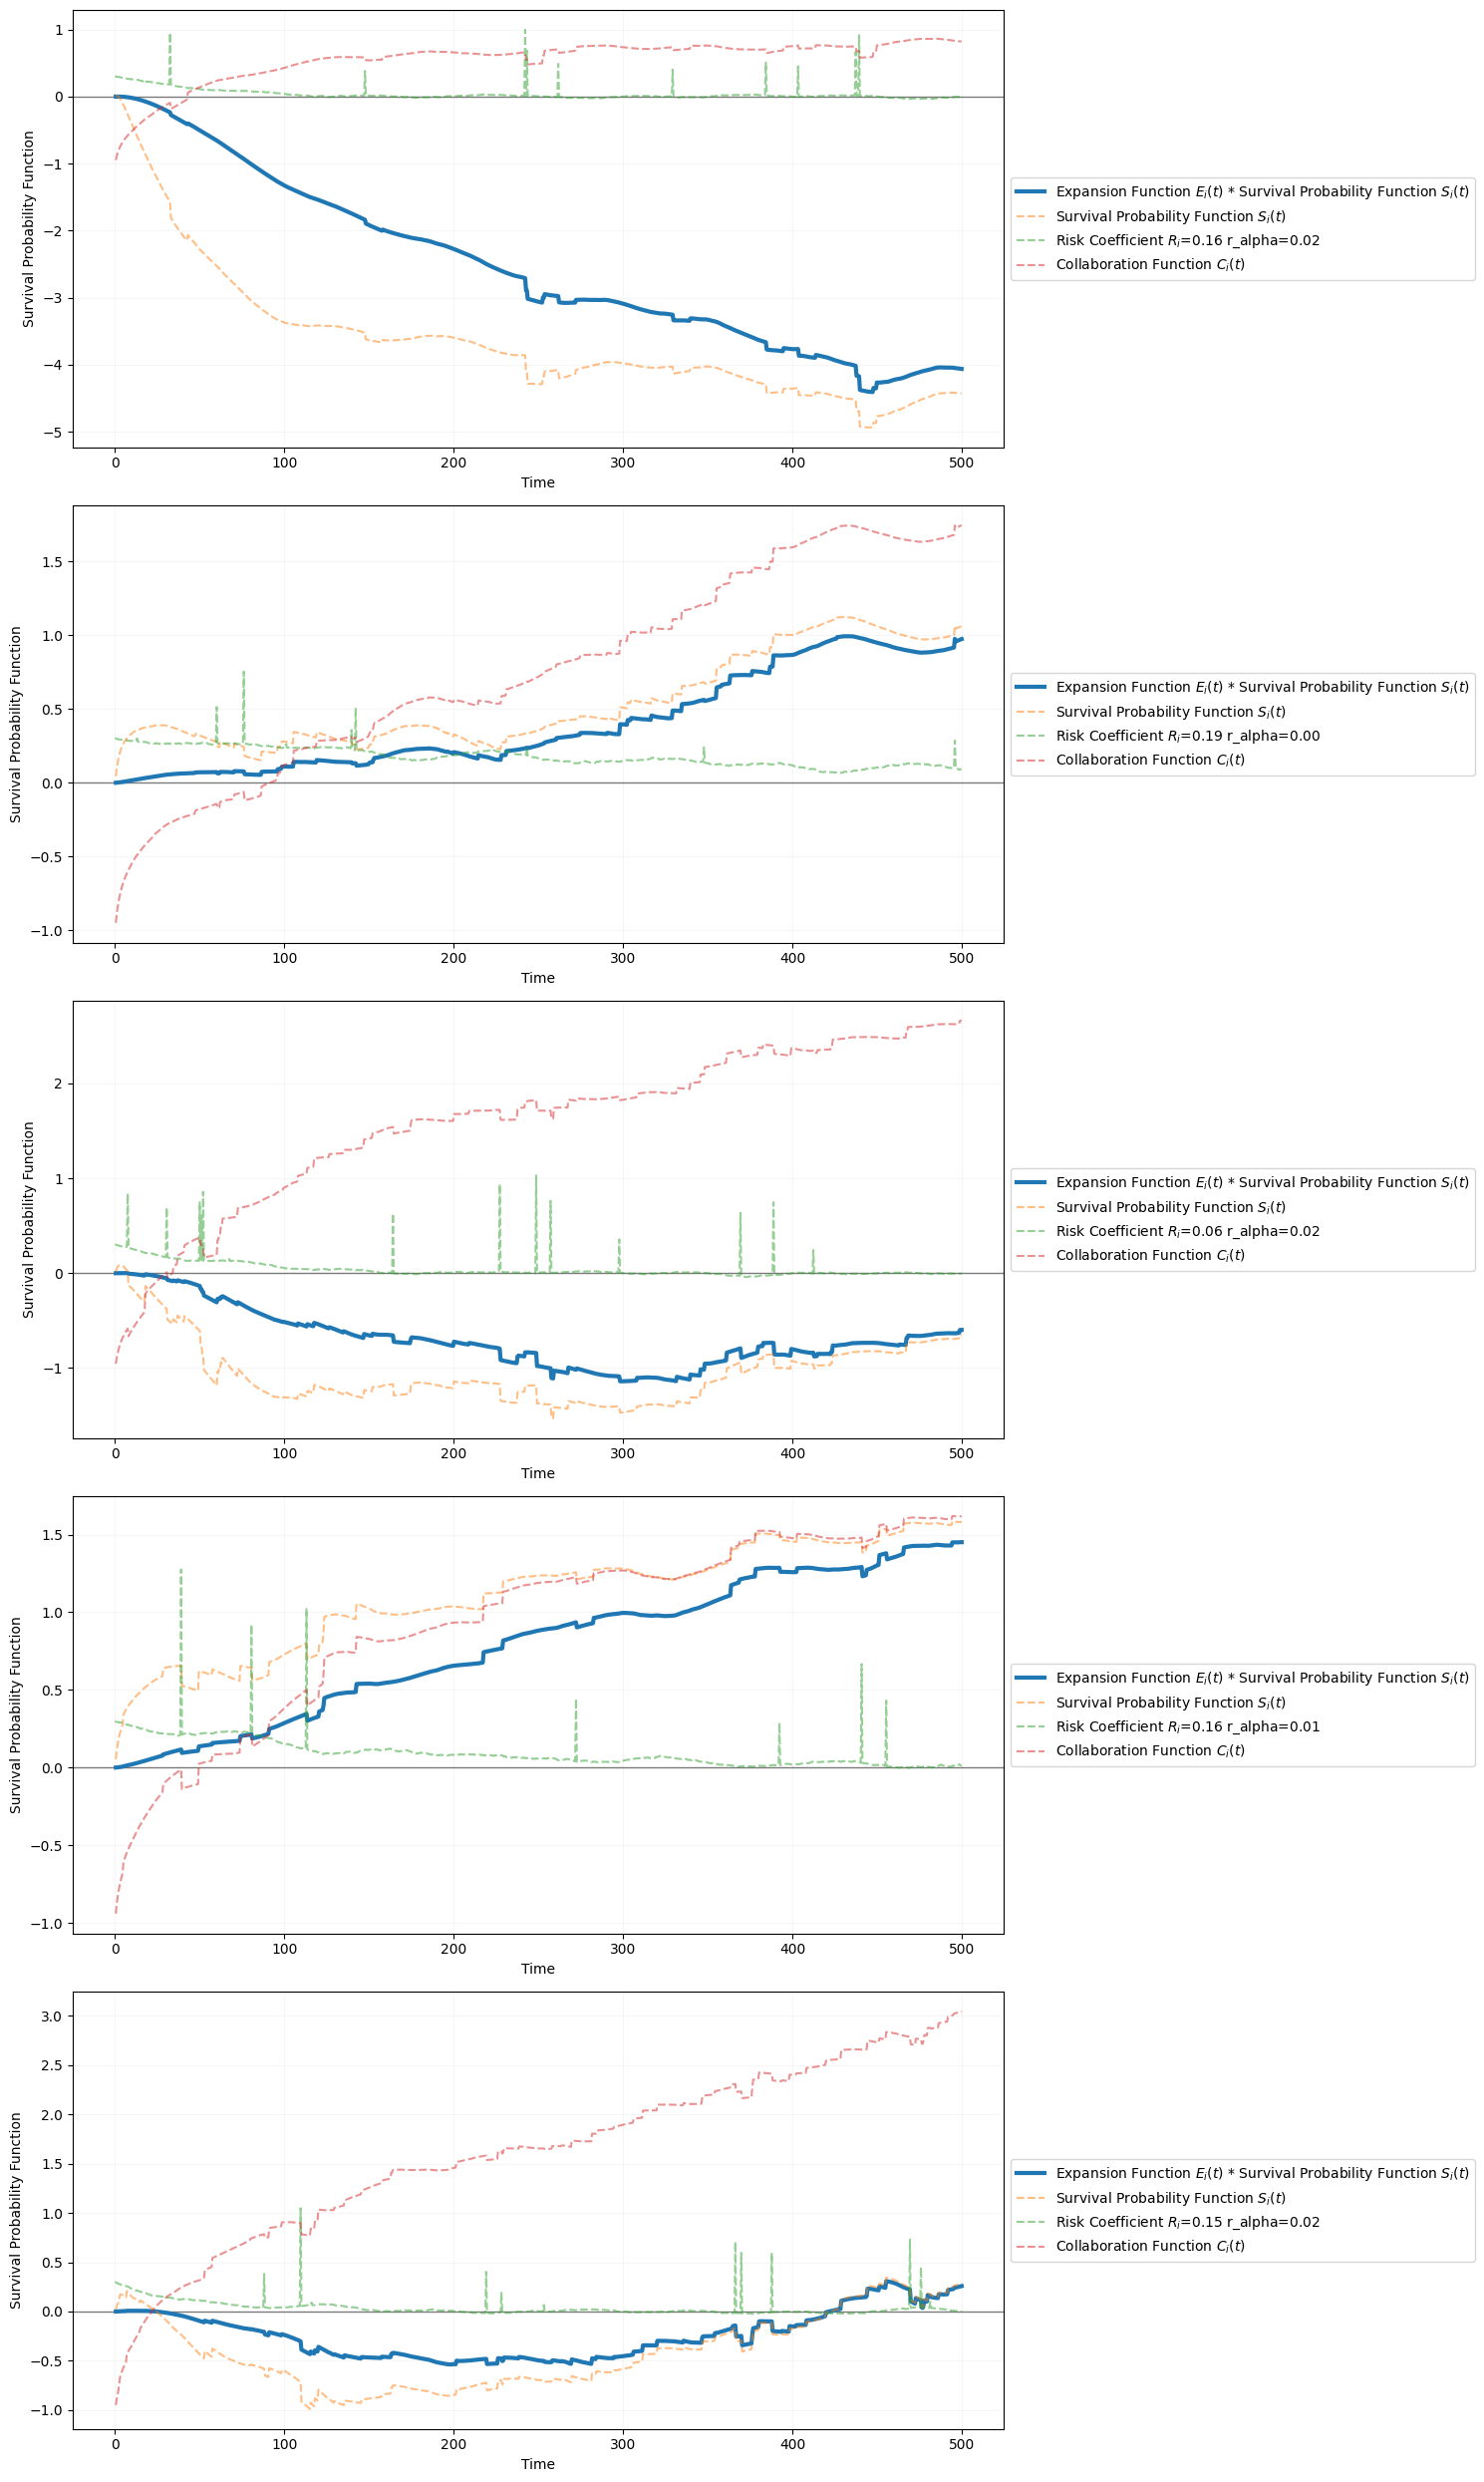

In [199]:
survival_f = []
exp_survival_f = []

for i in range(5):
    alpha = 0.01
    risk_coef = random.random() * .2
    survival = survival_probability_function(t, risk_f[i]['value'], collaboration_f[i]['value'], alpha, risk_coef)
    exp_survival = expansion_function(t) * survival
    survival_f.append({'label':'Survival Probability Function $S_i(t)$', 'value': survival})
    exp_survival_f.append({'label':'Expansion Function $E_i(t)$ * Survival Probability Function $S_i(t)$', 'value': exp_survival})
    
data = [exp_survival_f, survival_f, risk_f, collaboration_f]

plot_multiple(data, 'Time', 'Survival Probability Function')


## Competition scenario

Here we would consider the competition scenario. The competition scenario is based on the assumption that civilizations can compete with each other for resources, technology, and power. Competition can lead to wars, conflicts, and other negative outcomes that can reduce the chances of survival for civilizations.

### Competition function

The competition function C_i(t) over time for a civilization.

Assume:
- The competition coefficient C_i is low at the beginning and increases over time as competition requires more and more resources (armrace).
- Competition can lead to wars, conflicts, and other negative outcomes that reduce the chances of survival for civilizations.
- Blocking the technology, that reducing survival too (patents and secrets, technology wars and spying).
- Trust is reducing over time as the competition is increasing. Reducing trust increases the effects of the Black Swans events.
- At the beginning, competition can increase survival because of optimization, but at the end, optimization reduces the effort, but increasing the risks.

$$
\begin{equation}
C_i(t) = 1 - \alpha \cdot \log(t + 1) / \log(\text{adapt}) + \text{risk\_aver} + \text{bs\_sum}
\end{equation}
$$

TODO:
- Competition can lead to monopolisation when one civilization captures the power.
- Multipolar trup lead to take more risks as there the cost for any time spent as another civilisation can take advantage of a new technology.
- The hidden cost of competition is increasing over time as it requires more resources to hide the technology and knowledge.

In [200]:
def competition_function(t, risk, bs_sum, alpha, adapt=30, R_i=0.3, r_aver=20):
    """
    Competition coefficient C_i(t) over time for a civilization
    :param t: time
    :param risk: risks
    :param bs_sum: knowledge black swans
    :param alpha: coefficient for increasing of cost over time
    :param adapt: time for adaptation
    :param R_i: risk coefficient
    :param r_aver: average period for risks
    """
    
    # competition coefficient C_i low at the beginning and increase over time as civilizations adapt to each other
    competition_cost = alpha * np.log(t + 1) / np.log(adapt)
    
    # add risks, risk would have effect over time
    r_averg = []
    for i in range(len(t)):
        r_averg.append(np.mean(risk[max(0, i - r_aver):i]))
    # reduce the risk over time with the average risk (less trust - more risk)
    competition_cost += r_averg * remap(competition_cost, -R_i, 1, 3, 2) 
    
    # add black swans (negative, they can represent some advanced technology or knowledge)
    competition_cost += bs_sum

    # invert it as cost reduces survival
    return 1 - competition_cost
    return competition_cost

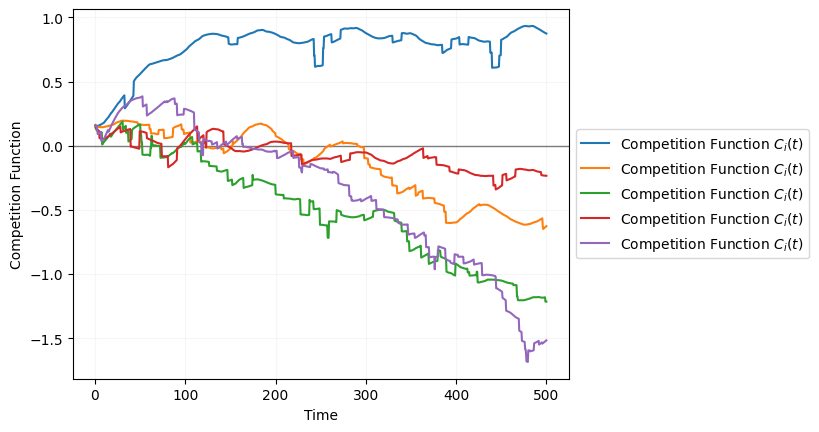

In [203]:
competition_f = []

for i in range(5):
    alpha = random.random() * .3
    comp_f = competition_function(t, risk_f[i]['value'], bs_compound_f[i]['value'], alpha)
    competition_f.append({'label':'Competition Function $C_i(t)$', 'value': comp_f})

plot(competition_f, 'Time', 'Competition Function')


### Survival probability function with competition

The survival probability function S_i(t) over time for a civilization with competition.

Assume:
- The survival probability is 1 at the beginning and reduces over time with a decay rate alpha.
- If the risk is high, the survival probability is lower.

$$
\begin{equation}
S_i(t) = \exp(-\alpha \cdot t) - \sum_{i=0}^{t} R_i \cdot \text{risk\_coef} + C_i(t)
\end{equation}
$$



In [204]:
def survival_probability_function_comp(t, risk, comp, alpha=0.01, risk_coef=0.1):
    """
    Survival probability function S_i(t) over time for a civilization
    :param t: time
    :param risk: risks
    :param comp: competition function
    :param alpha: decay rate
    :param risk_coef: risk coefficient
    """
    
    # The base survival probability is calculated using the mathematical expression np.exp(-alpha * t)
    survival = np.exp(-alpha * t)
    # risks
    risks = []
    for i in range(len(t)):
        risks.append(np.sum(risk[0:i]) * risk_coef)
    survival -= risks
    # # collaboration
    survival += comp
        
    return survival

In [206]:
survival_comp_f = []
exp_survival_comp_f = []

for i in range(5):
    alpha = 0.01
    risk_coef = random.random() * .2
    survival_comp = survival_probability_function_comp(t, risk_f[i]['value'], competition_f[i]['value'], alpha, risk_coef)
    exp_survival_comp = expansion_function(t) * survival_comp
    survival_comp_f.append({'label':'Survival Probability Function $S_i(t)$', 'value': survival_comp})
    exp_survival_comp_f.append({'label':'Expansion Function $E_i(t)$ * Survival Probability Function $S_i(t)$', 'value': exp_survival_comp})

data = [exp_survival_comp_f, survival_comp_f, risk_f, competition_f]

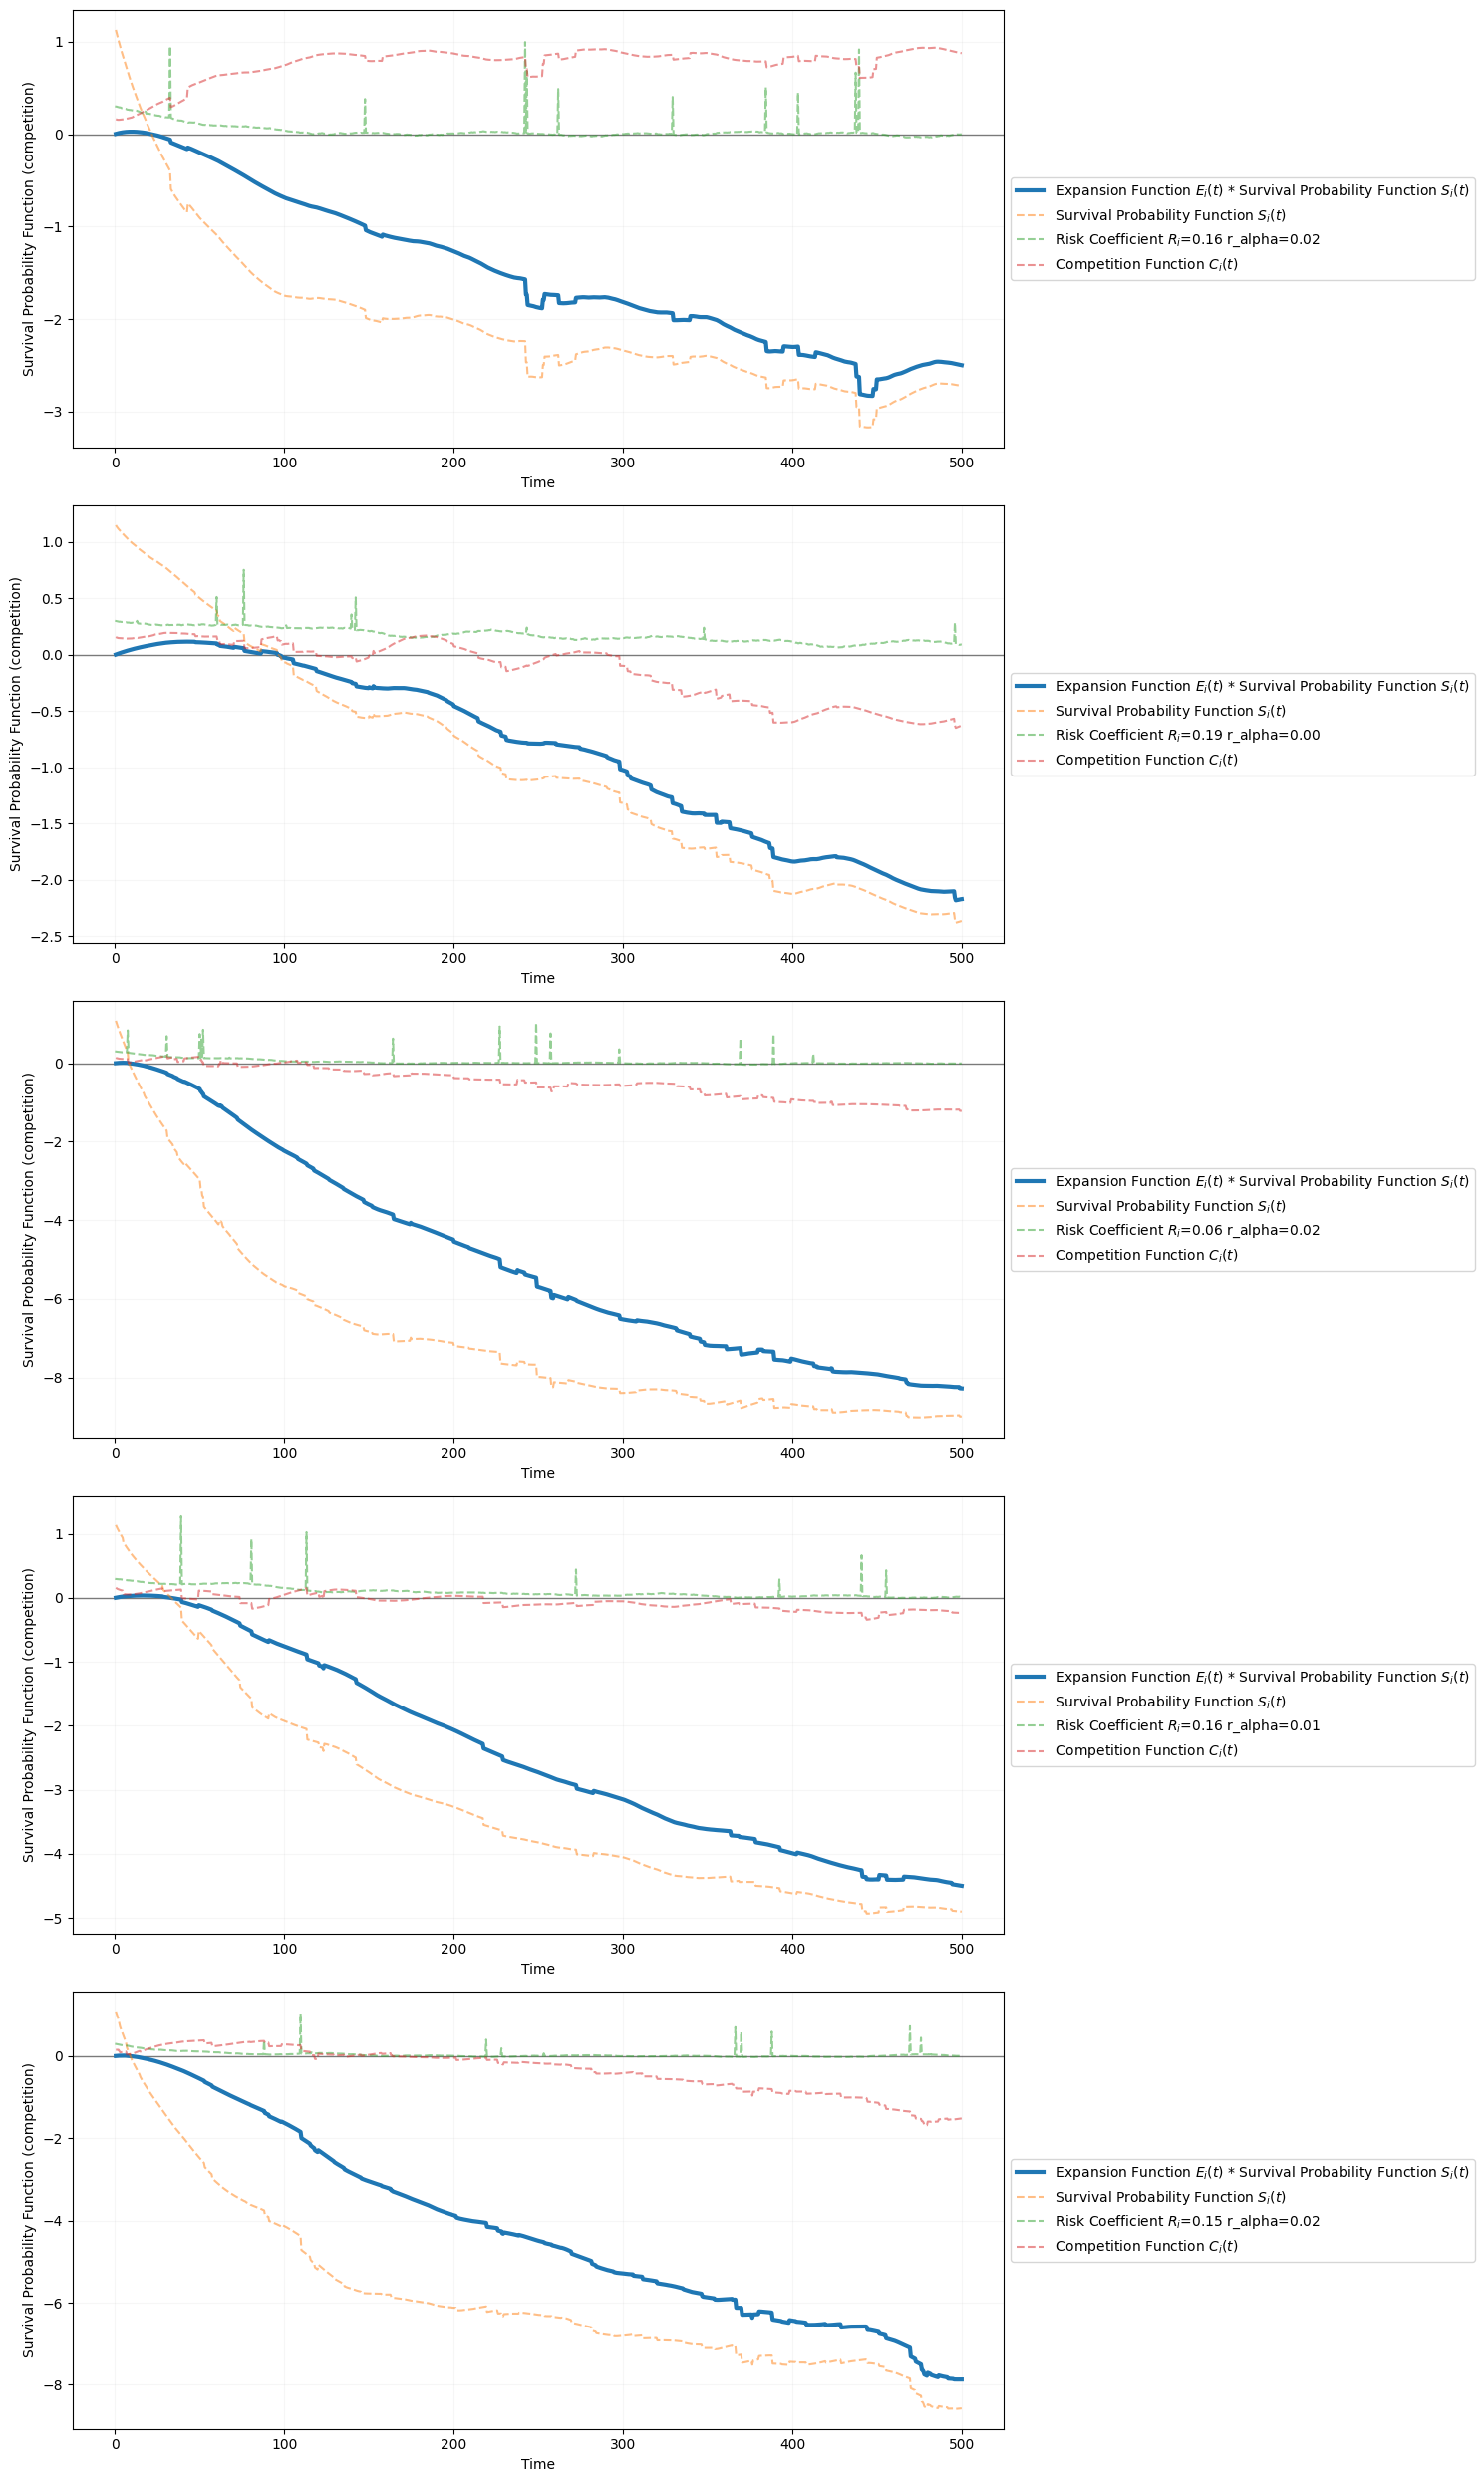

In [207]:
plot_multiple(data, 'Time', 'Survival Probability Function (competition)')

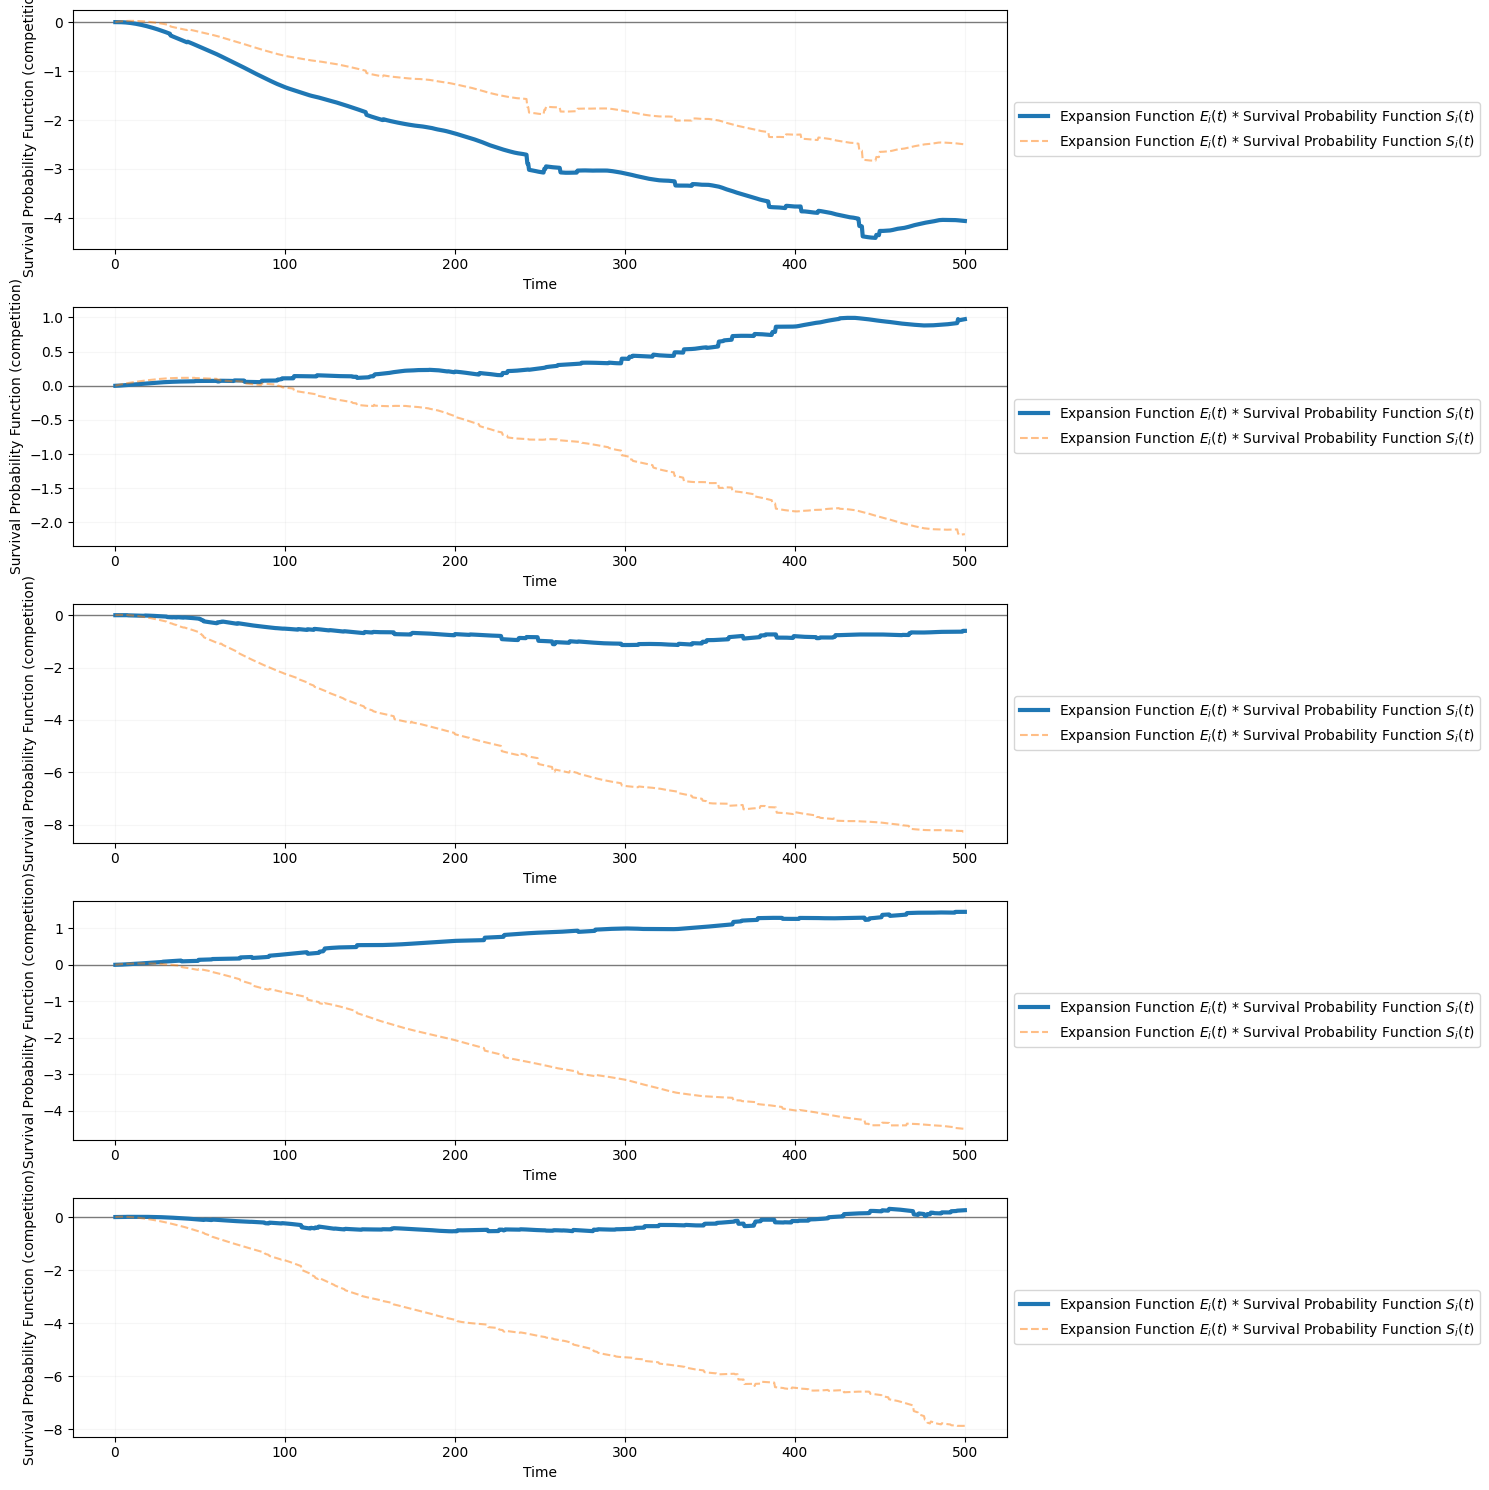

In [209]:
data = [exp_survival_f, exp_survival_comp_f]

plot_multiple(data, 'Time', 'Survival Probability Function (competition)', h=3)

## Run multiple

In [212]:
def run_sim():
    """
    Run simulation
    """
    # Resources
    resources = resources_function(t)
    
    # Resources scarcity
    resources_scarcity = resources_scarcity_function(t)
    
    # Risk coefficient
    risk = risk_coefficient(t)
    
    # Black swans
    bs_sum, bs = black_swans(t)
    
    # Collaboration
    col_f = collaboration_function(t, risk, bs_sum)
    
    # Survival probability function with collaboration
    survival = survival_probability_function(t, risk, col_f)
    
    # Expansion function
    exp_survival = expansion_function(t)
    
    # Survival probability function with competition
    comp_f = competition_function(t, risk, bs_sum, 0.3)
    survival_comp = survival_probability_function_comp(t, risk, comp_f)
    
    # Expansion function
    exp_survival_comp = expansion_function(t)
    
    return exp_survival, survival, exp_survival_comp, survival_comp, bs_sum, risk


In [215]:
def run_N_sim(N):
    """
    Run N simulations
    """
    exp_survival_col_av = np.zeros_like(t)
    survival_col_av = np.zeros_like(t)
    exp_survival_comp_av = np.zeros_like(t)
    survival_comp_av = np.zeros_like(t)
    bl_sw_av = np.zeros_like(t)
    risk_v = np.zeros_like(t)
    
    for i in range(N):
        exp_survival_col, survival_col, exp_survival_comp, survival_comp, bl_sw, risk = run_sim()
        exp_survival_col_av += exp_survival_col
        survival_col_av += survival_col
        exp_survival_comp_av += exp_survival_comp
        survival_comp_av += survival_comp
        bl_sw_av += bl_sw
        risk_v += risk
        
    return exp_survival_col_av, survival_col_av, exp_survival_comp_av, survival_comp_av, bl_sw_av, risk_v

In [216]:
exp_survival_col_av, survival_col_av, exp_survival_comp, survival_comp, bs_sum, risk = run_N_sim(5)

plot_multiple([exp_survival_col_av, survival_col_av, exp_survival_comp, survival_comp], 'Time', 'Survival Probability Function', h=3)

IndexError: invalid index to scalar variable.

Error in callback <function _draw_all_if_interactive at 0x000002427FC80C10> (for post_execute), with arguments args (),kwargs {}:


ValueError: Image size of 1500x300000 pixels is too large. It must be less than 2^16 in each direction.

ValueError: Image size of 1500x300000 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 1500x300000 with 1000 Axes>

## Kardashev scale


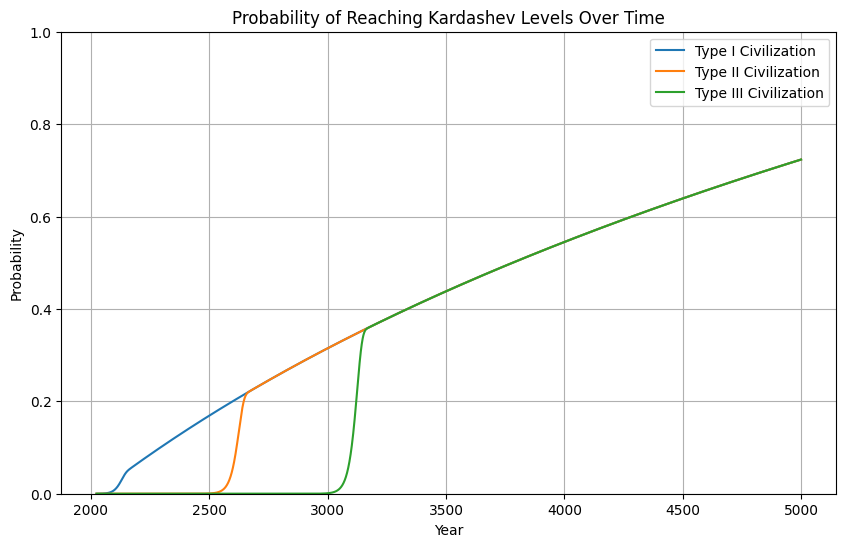

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Define constants
t0 = 2024  # Reference year
A = 0.8  # Scaling factor
B = 0.01  # Technology advancement factor

# Energy consumption required for each Kardashev level
E_K1 = 10**16  # Type I
E_K2 = 10**26  # Type II
E_K3 = 10**36  # Type III
# E_K4 = 10**46  # Type IV

# Projected energy consumption function (simplified model)
def E(t):
    return 10**(0.02 * (t - t0) + 16)  # Example growth model

# Probability function
def P(t, E_K):
    return A * np.log(t/t0) * (1 - np.exp(-B * E(t) / E_K))

# Time range
years = np.arange(2024, 5000, 1)

# Calculate probabilities
P_K1 = P(years, E_K1)
P_K2 = P(years, E_K2)
P_K3 = P(years, E_K3)
P_K4 = P(years, E_K4)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(years, P_K1, label='Type I Civilization')
plt.plot(years, P_K2, label='Type II Civilization')
plt.plot(years, P_K3, label='Type III Civilization')
# plt.plot(years, P_K4, label='Type IV Civilization')

plt.xlabel('Year')
plt.ylabel('Probability')
plt.title('Probability of Reaching Kardashev Levels Over Time')
plt.legend()
plt.grid(True)
plt.ylim(0, 1)
plt.show()